In [14]:
import pandas as pd

In [15]:
target06 = pd.read_csv("../data/processed/target06.csv")
target12 = pd.read_csv("../data/processed/target12.csv")
target24 = pd.read_csv("../data/processed/target24.csv")

### Pearson correlation coefficient
## $r_{XY} = \dfrac{cov(X,Y)}{\sigma_X \sigma_Y}$

In [16]:
target06.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.760448
month,-0.081213
weekday,-0.059408
hour,0.041729
wind-east,0.188281
wind-north,-0.120297
temperature,-0.318570
pressure,0.146662
target,1.000000


In [17]:
target12.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.627537
month,-0.082242
weekday,-0.046090
hour,0.038302
wind-east,0.162137
wind-north,-0.119463
temperature,-0.310214
pressure,0.165054
target,1.000000


In [18]:
target24.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.501434
month,-0.083247
weekday,-0.032376
hour,-0.008501
wind-east,0.147756
wind-north,-0.073093
temperature,-0.359690
pressure,0.176324
target,1.000000


### Spearman's rank correlation coefficient
## $r_{s} = \rho_{R(X),R(Y)} = \dfrac{cov(R(X),R(Y))}{\sigma_R(X) \sigma_R(Y)}$

In [19]:
target06.corr(method="spearman").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.672040
month,-0.061014
weekday,-0.053973
hour,0.058668
wind-east,0.204350
wind-north,-0.118121
temperature,-0.254550
pressure,0.098152
target,1.000000


In [20]:
target12.corr(method="spearman").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.523492
month,-0.063742
weekday,-0.045029
hour,0.039378
wind-east,0.169912
wind-north,-0.110724
temperature,-0.241973
pressure,0.117808
target,1.000000


In [21]:
target24.corr(method="spearman").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.401082
month,-0.064041
weekday,-0.041875
hour,-0.008029
wind-east,0.173907
wind-north,-0.072277
temperature,-0.307569
pressure,0.140641
target,1.000000


### Mutual information
## $I(X;Y) = \sum_y \sum_x P_{(X,Y)} (x, y)  log \left( \dfrac{P_{(X,Y)} (x,y)}{P_X (x) P_Y (y)} \right)$
https://en.wikipedia.org/wiki/Mutual_information

In [22]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(target06[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target06["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.37692618, 0.16033676, 0.0207129 , 0.00372372, 0.06719757,
       0.05312017, 0.13254653, 0.12679036])

In [23]:
mutual_info_regression(target12[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target12["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.22400983, 0.16077923, 0.02947516, 0.00478194, 0.04804196,
       0.01920807, 0.14454782, 0.1113935 ])

In [24]:
mutual_info_regression(target24[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target24["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.17015157, 0.15846327, 0.01692399, 0.00450276, 0.06024847,
       0.03293857, 0.15654432, 0.13743139])

### Violin plots

In [25]:
import matplotlib.pyplot as plt

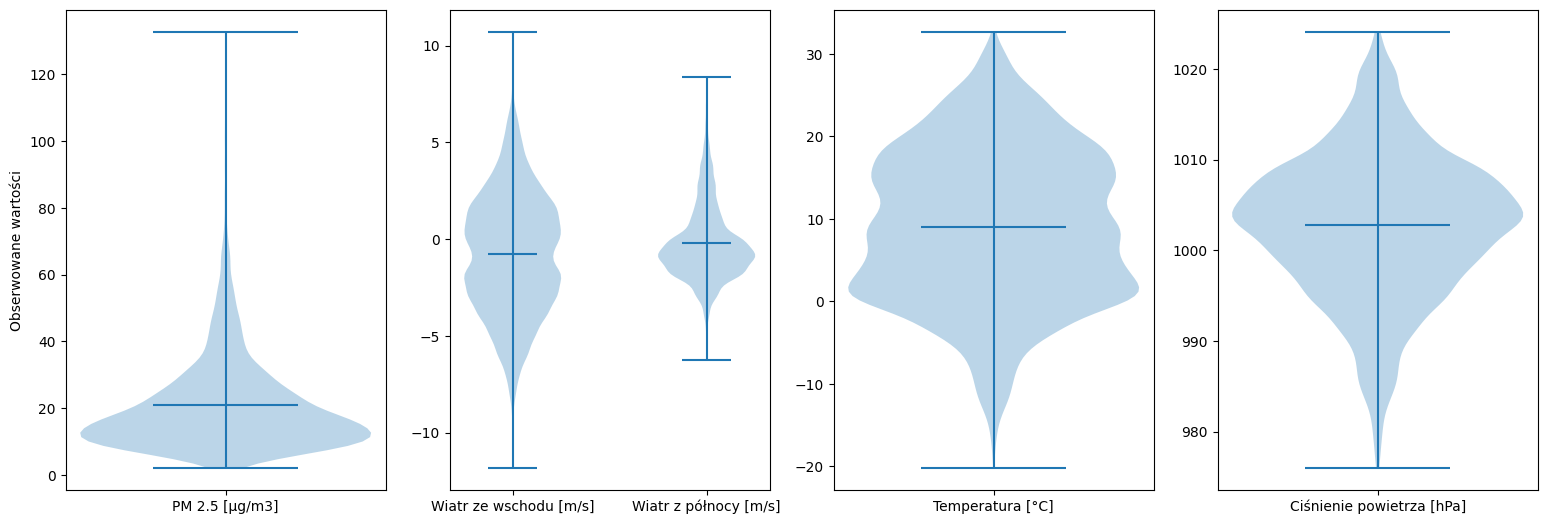

In [26]:
# Preparing violin plot
data_to_plot = target06.to_numpy()

fig = plt.figure()
ax0 = fig.add_axes([0,0,0.5,1])
ax1 = fig.add_axes([0.6,0,0.5,1])
ax2 = fig.add_axes([1.2,0,0.5,1])
ax3 = fig.add_axes([1.8,0,0.5,1])

ax0.violinplot([data_to_plot[:,0]], showmeans=True)
ax1.violinplot([data_to_plot[:,4], data_to_plot[:,5]], showmeans=True)
ax2.violinplot([data_to_plot[:,6]], showmeans=True)
ax3.violinplot([data_to_plot[:,7]], showmeans=True)
ax0.set_ylabel('Obserwowane wartości')
ax0.set_xticks([1], labels = ['PM 2.5 [µg/m3]'])
ax1.set_xticks([1, 2], labels = ['Wiatr ze wschodu [m/s]', 'Wiatr z północy [m/s]'])
ax2.set_xticks([1], labels = ['Temperatura [°C]'])
ax3.set_xticks([1], labels = ['Ciśnienie powietrza [hPa]'])

plt.show()